<a href="https://colab.research.google.com/github/Vedika1110/NNDL-Lab/blob/main/CNN_Hndwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the neccessary liabraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Downloading the dataset and splitting the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train[0].shape

(28, 28)

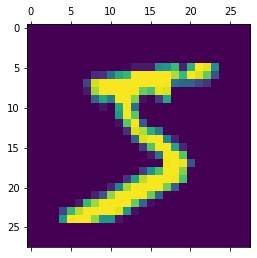

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Using ANN for classification**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1262 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0690 - accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0551 - accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0431 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0260 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

Evaluating the model based on ANN classification

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.9774


[0.0847051665186882, 0.977400004863739]

The accuracy using ANN is around **97%** and loss is also high

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

**Using CNN for classification**

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1615 - accuracy: 0.9528
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0534 - accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0362 - accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0239 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0178 - accuracy: 0.9942


Evaluating model based on CNN classification

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0465 - accuracy: 0.9856


[0.04649650305509567, 0.9855999946594238]

The accuracy using CNN is around **98%** and loss is also lesser than compare to ANN 